In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics(csv_file):
    # Read the CSV file
    data = pd.read_csv(csv_file)
    
    methods = data['Method']
    metrics = ['MAP', 'MRR', 'Recall@1000', 'NDCG@3']

    fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(20, 5))

    for i, metric in enumerate(metrics):
        axes[i].bar(methods, data[metric], color='skyblue')
        axes[i].set_title(metric)
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel(metric)

    plt.tight_layout()
    plt.show()

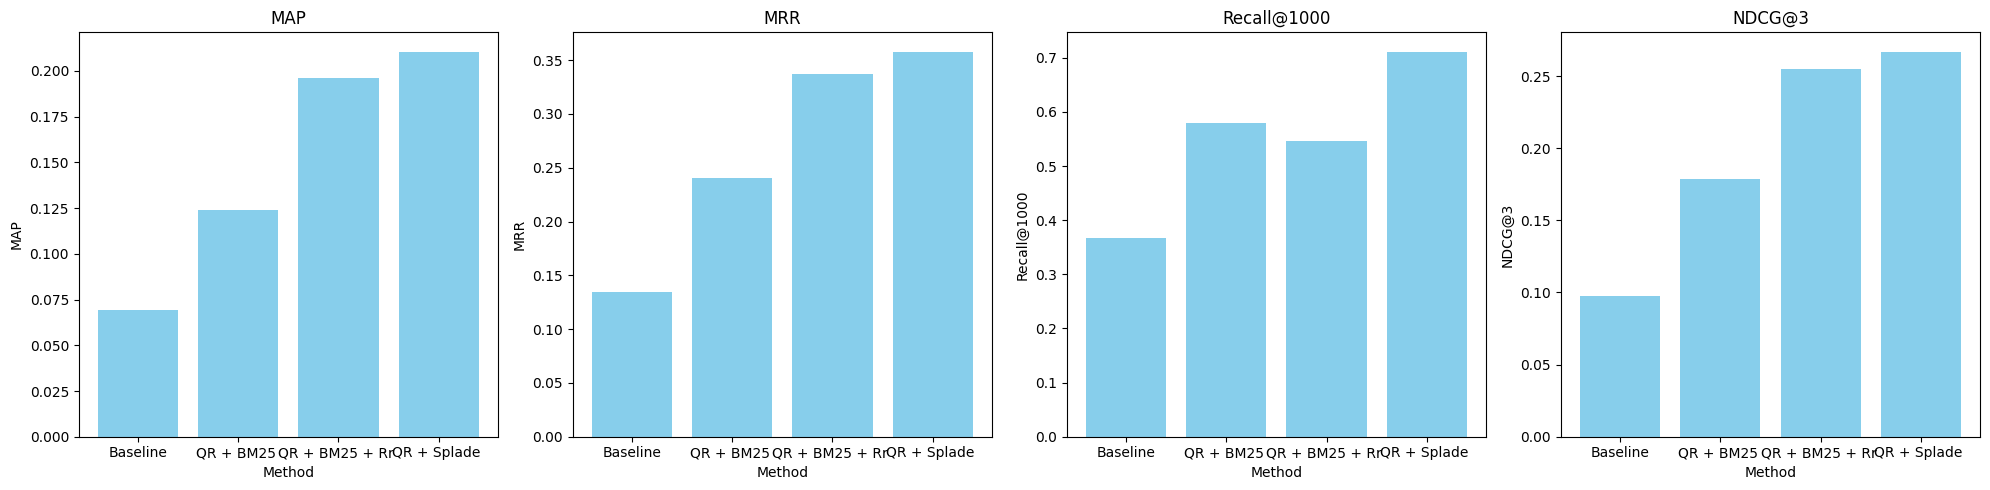

In [2]:
path_csv='scores.csv'
plot_metrics(path_csv)

In [3]:
def plot_recall_vs_others(csv_file):
    # Read the CSV file
    data = pd.read_csv(csv_file)

    methods = data['Method']
    other_metrics = ['MAP', 'MRR', 'NDCG@3']

    # Define different markers for each method
    markers = ['o', 's', '^', 'D']
    if len(methods) > len(markers):
        raise ValueError("Not enough markers defined for the number of methods")

    # Create a 2x2 subplot grid
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    axes = axes.flatten() 

    for i, metric in enumerate(other_metrics):
        for j, method in enumerate(methods):
            axes[i].scatter(data[data['Method'] == method]['Recall@1000'], 
                            data[data['Method'] == method][metric], 
                            label=method, 
                            marker=markers[j])

        # Annotate each point with the method label
        for label, x, y in zip(methods, data['Recall@1000'], data[metric]):
            axes[i].annotate(label, (x, y))

        axes[i].set_xlabel('Recall@1000')
        axes[i].set_ylabel(metric)
        axes[i].set_title(f'Recall@1000 vs {metric}')
        if i == 0:  # Add legend only to the first plot for neatness
            axes[i].legend()

    # Hide the unused subplot (if any)
    for ax in axes[len(other_metrics):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()


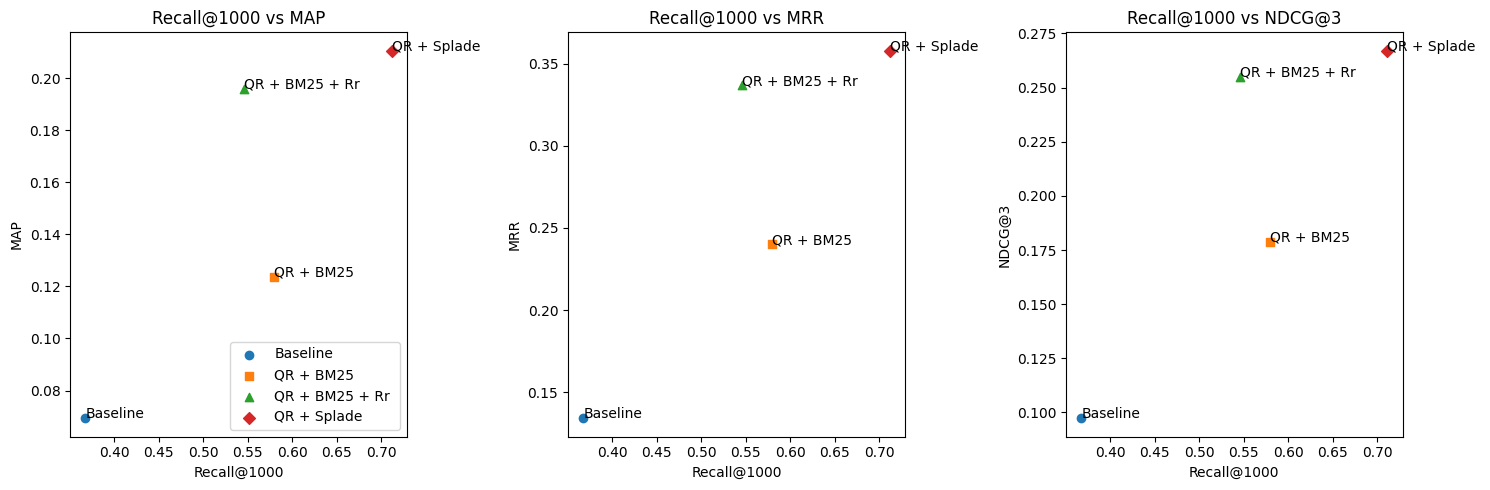

In [4]:
plot_recall_vs_others(path_csv)